# Pandas

### Chargement et objet central

In [1]:
import pandas as pd

In [7]:
df = pd.DataFrame([
                   ["A","B","C"],
                   [1,2,3],
                   [".","#",","],
                   [None,None,None]
                  ]
                 )

In [8]:
df

,0,1,2
0,A,B,C
1,1,2,3
2,.,#,","
3,None,None,None


In [5]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.shape

(4, 3)

In [11]:
df.columns = ["Colonne 1","Colonne 2","Colonne 3"]

In [12]:
df

,Colonne 1,Colonne 2,Colonne 3
0,A,B,C
1,1,2,3
2,.,#,","
3,None,None,None


In [13]:
df.index = ["ligne1","ligne2","ligne3","ligne4"]

In [16]:
df["Colonne 1"]

ligne1       A
ligne2       1
ligne3       .
ligne4    None
Name: Colonne 1, dtype: object

In [19]:
df.loc["ligne1","Colonne 1"]  = "Nouvelle valeur"

In [20]:
df

,Colonne 1,Colonne 2,Colonne 3
ligne1,Nouvelle valeur,B,C
ligne2,1,2,3
ligne3,.,#,","
ligne4,None,None,None


## Chargement de données réelles

In [45]:
df = pd.read_excel("/home/emilien/Téléchargements/litteracie_informatique_en_amont_de_la_formation.xlsx",header=2)

In [46]:
df.columns = ['Séquentiel', 'SID', 'Heure de soumission', 'Heure de complétion',
       'Heure de modification', 'Brouillon', 'Adresse IP', 'UID',
       'Nom',
       'role_ordinateur',
       'code_source',
       'fichier_csv',
       'base_langage',
       'boucle',
       'utiliser_programmation',
       'reconnaitre_python',
       'console_python',
       'programmation_python',
       'fonction_python',
       'pandas',
       'superposer_graphique',
       'idee_application',
       'aspect_interet']

In [34]:
df.to_excel("nouveau_tableau.xlsx")

In [47]:
df = df.drop(columns = df.columns[0:9])
df

,role_ordinateur,code_source,fichier_csv,base_langage,boucle,utiliser_programmation,reconnaitre_python,console_python,programmation_python,fonction_python,pandas,superposer_graphique,idee_application,aspect_interet
0,Oui,Oui,Oui,Oui,Oui,Oui,Non,Non,Non,Non,Non,Non,NaN,NaN
1,Oui,Oui,Oui,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non,NaN,NaN
2,Oui,Oui,Oui,Oui,Oui,Oui,Non,Non,Non,Non,Non,Non,NaN,NaN
3,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Traitement de données textuelles extraites de ...,"Connaîte les bases, non pas pour devenir exper..."
4,Oui,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,non,NaN
5,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,NaN,Découvrir le langage de programmation Python
6,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,"Automatiser des actions, traitement en lot","Savoir déchiffrer, comprendre un script écrit ..."
7,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Faire des traitement en lots et automatiser de...,Acquérir les bases pour comprendre les scripts...
8,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non! Je l'apprendrai grâce à votre formation,Oui!
9,Oui,Non,Oui,Oui,Non,Non,Non,Non,Non,Oui,Non,Non,NaN,NaN


In [44]:
df.columns

Index(['fonction_python', 'pandas', 'superposer_graphique', 'idee_application',
       'aspect_interet'],
      dtype='object')

In [49]:
df["role_ordinateur"].value_counts()

Oui    10
Non     1
Name: role_ordinateur, dtype: int64

In [54]:
round(df["role_ordinateur"].value_counts(normalize=True)*100,2)

Oui    90.91
Non     9.09
Name: role_ordinateur, dtype: float64

In [50]:
df["role_ordinateur"].unique()

array(['Oui', 'Non'], dtype=object)

In [56]:
df["code_source"].value_counts()

Oui    8
Non    3
Name: code_source, dtype: int64

In [57]:
pd.crosstab(df["code_source"],df["utiliser_programmation"])

utiliser_programmation,Non,Oui
code_source,,
Non,3,0
Oui,5,3


In [61]:
#!pip install pyshs
import pyshs
pyshs.tableau_croise(df,"code_source","utiliser_programmation")

,Non,Oui,Total
Non,3.0 (100.0%),0.0 (0.0%),3 (100%)
Oui,5.0 (62.5%),3.0 (37.5%),8 (100%)
Total,8.0 (72.7%),3.0 (27.3%),11 (100%)


In [64]:
tableau = {}
for variable in df.columns[0:10]:
    tableau[variable] = df[variable].value_counts()
pd.concat(tableau,axis=1).to_excel("tableau_distribution_univariee.xls")

/tmp/ipykernel_15143/2449691002.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  pd.concat(tableau,axis=1).to_excel("tableau_distribution_univariee.xls")


<AxesSubplot:ylabel='code_source'>

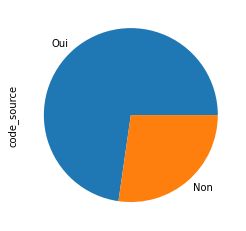

In [71]:
df["code_source"].value_counts().plot(kind="pie")

## Calcul d'un score

<AxesSubplot:ylabel='Frequency'>

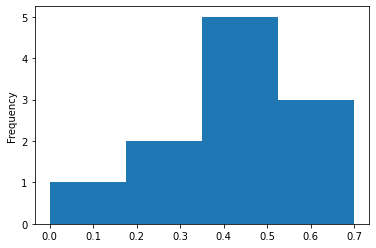

In [81]:
score = df[df.columns[0:10]].replace({"Oui":1,"Non":0}).sum(axis=1)/10
score.plot(kind="hist",bins=4)

In [86]:
filtre = df["code_source"]=="Non"
df[filtre]

,role_ordinateur,code_source,fichier_csv,base_langage,boucle,utiliser_programmation,reconnaitre_python,console_python,programmation_python,fonction_python,pandas,superposer_graphique,idee_application,aspect_interet
8,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non! Je l'apprendrai grâce à votre formation,Oui!
9,Oui,Non,Oui,Oui,Non,Non,Non,Non,Non,Oui,Non,Non,NaN,NaN
10,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Pas encore avec Python.,Le lexique et les bases essentielles à la pris...


In [92]:
filtre = pd.notnull(df["idee_application"]) | pd.notnull(df["aspect_interet"])
df[filtre]

,role_ordinateur,code_source,fichier_csv,base_langage,boucle,utiliser_programmation,reconnaitre_python,console_python,programmation_python,fonction_python,pandas,superposer_graphique,idee_application,aspect_interet
3,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Traitement de données textuelles extraites de ...,"Connaîte les bases, non pas pour devenir exper..."
4,Oui,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,non,NaN
5,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,NaN,Découvrir le langage de programmation Python
6,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,"Automatiser des actions, traitement en lot","Savoir déchiffrer, comprendre un script écrit ..."
7,Oui,Oui,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Faire des traitement en lots et automatiser de...,Acquérir les bases pour comprendre les scripts...
8,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non! Je l'apprendrai grâce à votre formation,Oui!
10,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Pas encore avec Python.,Le lexique et les bases essentielles à la pris...


In [100]:
textes = list(df["idee_application"].dropna())
textes_decomposes = [texte.lower().split(" ") for texte in textes]
pd.Series([mot for texte in textes_decomposes for mot in texte]).value_counts()

traitement      3
des             3
automatiser     2
en              2
de              2
à               2
formation       1
votre           1
grâce           1
l'apprendrai    1
faire           1
je              1
non!            1
opérations.     1
et              1
                1
pas             1
encore          1
avec            1
lots            1
actions,        1
lot             1
non             1
\n              1
dates.          1
différentes     1
site            1
d'un            1
issu            1
html            1
fichiers        1
extraites       1
textuelles      1
données         1
python.         1
dtype: int64